## Descriptive Statistics

In [56]:
import pandas as pd
news_df = pd.read_csv("../data/raw/raw_analyst_ratings.csv", index_col=False)

In [57]:
news_df.describe()
# news_df.shape

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [58]:
# we need to remove the unnamed column
news_df.drop(columns=['Unnamed: 0'], inplace=True)

In [59]:
#now we can do describe again
news_df.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,39957,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00,MRK
freq,5449,1704,228373,1766,3333


## we cann see that the dataset ..

In [60]:
#checkk for null value per column
news_df.isnull().sum()
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   headline   1407328 non-null  object
 1   url        1407328 non-null  object
 2   publisher  1407328 non-null  object
 3   date       1407328 non-null  object
 4   stock      1407328 non-null  object
dtypes: object(5)
memory usage: 53.7+ MB


#### it can be seen that there are no missing /null values in any of the columns

## Analyzing headline lengths

In [61]:
#convert headline to string since it is an object type
news_df['headline'] = news_df['headline'].convert_dtypes(str)
news_df['headline_length'] = news_df['headline'].apply(len)
news_df.describe()

,headline_length
count,1.407328e+06
mean,7.312051e+01
std,4.073531e+01
min,3.000000e+00
25%,4.700000e+01
50%,6.400000e+01
75%,8.700000e+01
max,5.120000e+02


### Analysis of the headline lengths shows that:
    #### The shortest headline has 3 words/characters in it.
    #### The longest headline has 512 words/characters in it.
    #### On average a headline has 40.7 words/characters in it.
    #### The 25th percentile has 47 words/characters in it.
    #### The 75th percentile has 87 words/characters in it.

## Analyzing Number of Articles per Publisher

In [62]:
publisher_grouping = news_df.groupby('publisher').count().sort_values(by='headline' , ascending=False)
publisher_grouping[['headline']].head(50)


,headline
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
Eddie Staley,57254
Hal Lindon,49047
ETF Professor,28489
Juan Lopez,28438


## Analyzing Publication Dates

[Text(0.5, 0, 'Hour of Day'), Text(0, 0.5, 'Proportion of Articles Published')]

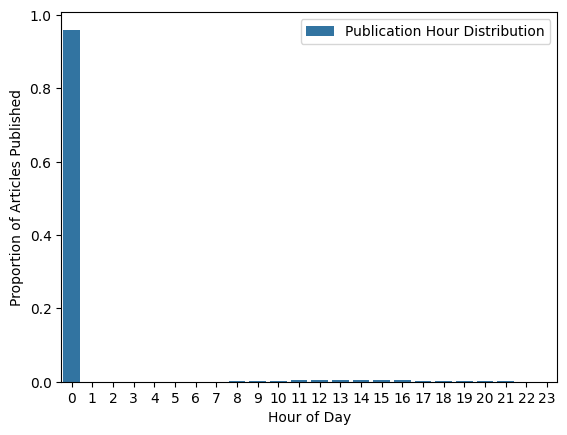

In [94]:
news_df['date'] = pd.to_datetime(news_df['date'], utc=True, format='mixed')
import seaborn as sns
sns.barplot(x=news_df['date'].dt.hour.value_counts().index, y=news_df['date'].dt.hour.value_counts(normalize=True).values,label='Publication Hour Distribution').set(xlabel='Hour of Day', ylabel='Proportion of Articles Published')


C:\Users\yeget\AppData\Local\Temp\ipykernel_22112\2058224940.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ).set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], xlabel='Day of Week', ylabel='Proportion of Articles Published')


[[Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')],
 Text(0.5, 0, 'Day of Week'),
 Text(0, 0.5, 'Proportion of Articles Published')]

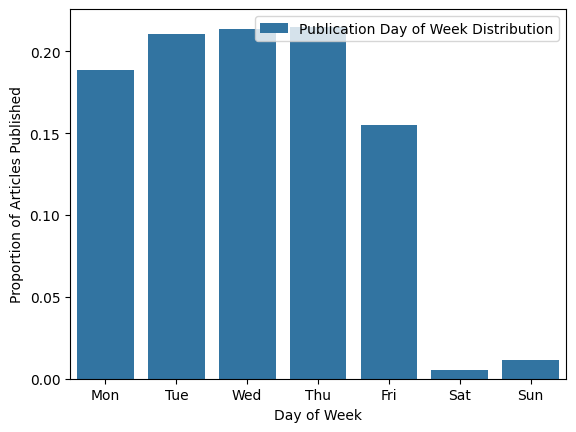

In [95]:
# chnage the x label to day of week
sns.barplot(x=news_df['date'].dt.dayofweek.value_counts().index, y=news_df['date'].dt.dayofweek.value_counts(normalize=True).values,label='Publication Day of Week Distribution', 
        ).set(xticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], xlabel='Day of Week', ylabel='Proportion of Articles Published')

C:\Users\yeget\AppData\Local\Temp\ipykernel_22112\2225009569.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns.barplot(x=news_df['date'].dt.month.value_counts().index, y=news_df['date'].dt.month.value_counts(normalize=True).values,label='Publication Month Distribution').set(xlabel='Month', ylabel='Proportion of Articles Published',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Proportion of Articles Published'),
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')]]

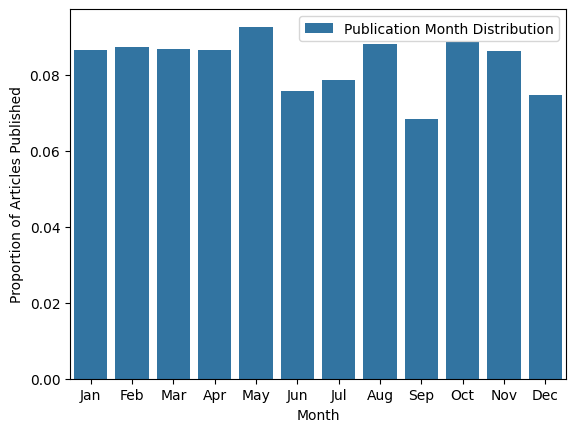

In [96]:
sns.barplot(x=news_df['date'].dt.month.value_counts().index, y=news_df['date'].dt.month.value_counts(normalize=True).values,label='Publication Month Distribution').set(xlabel='Month', ylabel='Proportion of Articles Published',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


Start Date:  2009-02-14 00:00:00+00:00
End Date:  2020-06-11 21:12:35+00:00


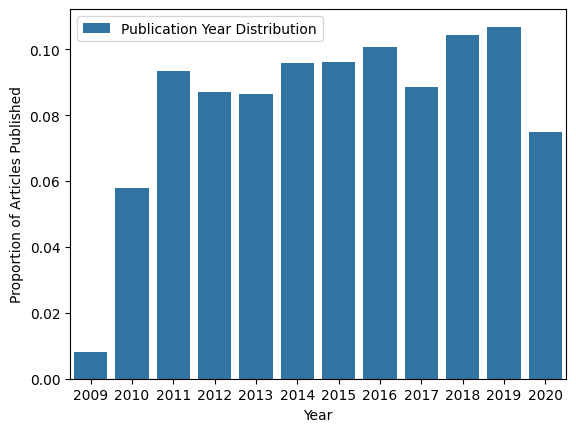

In [98]:
sns.barplot(x=news_df['date'].dt.year.value_counts().index, y=news_df['date'].dt.year.value_counts(normalize=True).values,label='Publication Year Distribution').set(xlabel='Year', ylabel='Proportion of Articles Published')
#show the start date and end date
print("Start Date: ", news_df['date'].min())
print("End Date: ", news_df['date'].max())